# Regression logistique multinomial & binaire

## Exercices

#### Exercice 1 
Appliquez le modèle de régression logistique sur la dataset “iris“.
Pour les données :
* via le module ou
* via le téléchargement du fichier https://www.kaggle.com/saurabh00007/iriscsv?select=Iris.csv

In [74]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
try:
    from sklearn.utils._testing import ignore_warnings
except ImportError:
    from sklearn.utils.testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning

In [2]:
iris = load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [40]:
type(iris)

sklearn.utils.Bunch

In [3]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

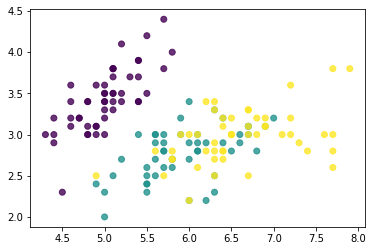

In [4]:
X = iris.data
y = iris.target

plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
# plt.legend()

In [5]:
type(iris)

sklearn.utils.Bunch

In [6]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [42]:
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


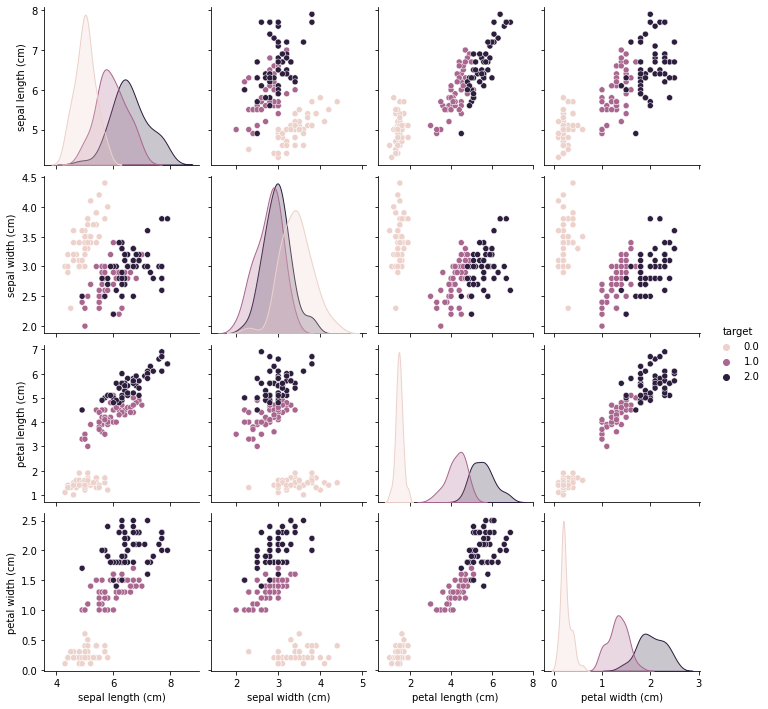

In [43]:
#sns.set_palette('husl')
g = sns.pairplot(df, hue='target')

In [9]:
logreg = LogisticRegression()
logreg.fit(X, y)
y_pred = logreg.predict(X)
print(accuracy_score(y, y_pred))

0.9733333333333334


C:\Program Files\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [10]:
logreg = LogisticRegression(solver="liblinear", C=10, random_state=42)
logreg.fit(X, y)
y_pred = logreg.predict(X)
print(accuracy_score(y, y_pred))

0.9666666666666667


In [11]:
iris.data.shape

(150, 4)

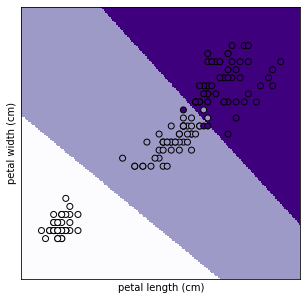

In [47]:
X = iris.data[:, 2:4]  # we only take the first two features.
Y = iris.target

# Create an instance of Logistic Regression Classifier and fit the data.
logreg = LogisticRegression(C=1e5, multi_class="multinomial")
logreg.fit(X, Y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
h = 0.02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
cmap_color = plt.cm.Purples
# Put the result into a color plot
Z = Z.reshape(xx.shape)
figure, axes = plt.subplots(1,1)
figure.patch.set_facecolor("white")
plt.pcolormesh(xx, yy, Z, cmap=cmap_color)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors="k", cmap=cmap_color)
plt.xlabel(iris['feature_names'][2])
plt.ylabel(iris['feature_names'][3])

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
figure.set_size_inches(5, 5, forward=True)
plt.show()

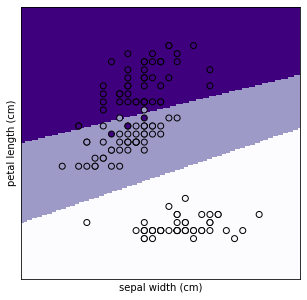

In [48]:
X = iris.data[:, [1, 3]]  # we only take the first two features.
Y = iris.target

# Create an instance of Logistic Regression Classifier and fit the data.
logreg = LogisticRegression(C=1e5, multi_class="multinomial")
logreg.fit(X, Y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
h = 0.02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
cmap_color = plt.cm.Purples
# Put the result into a color plot
Z = Z.reshape(xx.shape)
figure, axes = plt.subplots(1,1)
figure.patch.set_facecolor("white")
plt.pcolormesh(xx, yy, Z, cmap=cmap_color)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors="k", cmap=cmap_color)
plt.xlabel(iris['feature_names'][1])
plt.ylabel(iris['feature_names'][2])

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
figure.set_size_inches(5, 5, forward=True)
plt.show()

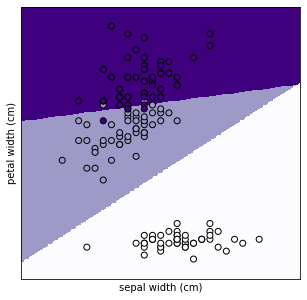

In [50]:
X = iris.data[:, 1:3]  # we only take the first two features.
Y = iris.target

# Create an instance of Logistic Regression Classifier and fit the data.
logreg = LogisticRegression(C=1e5, multi_class="multinomial")
logreg.fit(X, Y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
h = 0.02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
cmap_color = plt.cm.Purples
# Put the result into a color plot
Z = Z.reshape(xx.shape)
figure, axes = plt.subplots(1,1)
figure.patch.set_facecolor("white")
plt.pcolormesh(xx, yy, Z, cmap=cmap_color)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors="k", cmap=cmap_color)
plt.xlabel(iris['feature_names'][1])
plt.ylabel(iris['feature_names'][3])

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
figure.set_size_inches(5, 5, forward=True)
plt.show()

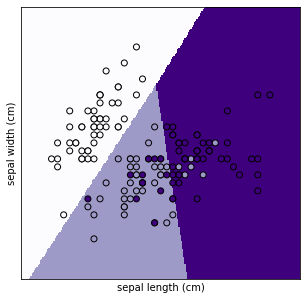

In [51]:
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

# Create an instance of Logistic Regression Classifier and fit the data.
logreg = LogisticRegression(C=1e5, multi_class="multinomial")
logreg.fit(X, Y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
h = 0.02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
cmap_color = plt.cm.Purples
# Put the result into a color plot
Z = Z.reshape(xx.shape)
figure, axes = plt.subplots(1,1)
figure.patch.set_facecolor("white")
plt.pcolormesh(xx, yy, Z, cmap=cmap_color)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors="k", cmap=cmap_color)
plt.xlabel(iris['feature_names'][0])
plt.ylabel(iris['feature_names'][1])

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
figure.set_size_inches(5, 5, forward=True)
plt.show()

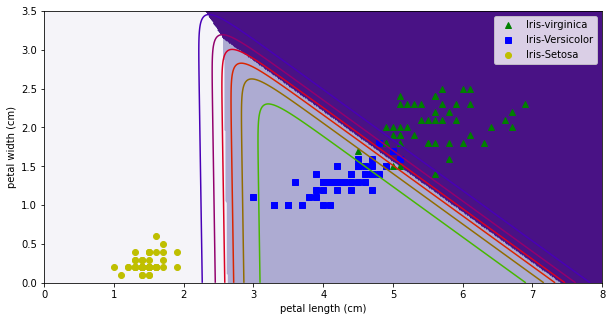

In [73]:
X = iris.data[:, -2:]  # we only take two features.
y = iris.target

# Create an instance of Logistic Regression Classifier and fit the data.
softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

x0, x1 = np.meshgrid(np.linspace(0,8,500).reshape(-1,1), np.linspace(0,3.5,200).reshape(-1,1),)
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:,1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

# Put the result into a color plot
cmap_color = plt.cm.Purples

figure, axes = plt.subplots(1,1)
figure.patch.set_facecolor("white")

# Plot also the training points
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa")
plt.xlabel(iris['feature_names'][2])
plt.ylabel(iris['feature_names'][3])

plt.contourf(x0,x1,zz, cmap=cmap_color)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)

plt.legend()

figure.set_size_inches(10, 5, forward=True)
plt.show()

In [62]:
X = iris.data  # we only take the first two features.
Y = iris.target
x_train, x_test, y_train, y_test=train_test_split(X,Y,test_size=0.2)

In [64]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

In [69]:
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression(multi_class="multinomial")
logreg_cv=GridSearchCV(logreg,grid,cv=10)

In [77]:
@ignore_warnings(category=ConvergenceWarning)
def train(logreg_cv, x_train,y_train):
    logreg_cv.fit(x_train,y_train)

In [78]:
train(logreg_cv, x_train,y_train)

C:\Program Files\Python39\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
70 fits failed out of a total of 140.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Program Files\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Program Files\Python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Program Files\Python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(

Catégoriel
Pipeline
GridSearchCV
SVR

In [ ]:
from sklearn.svm import SVR
x = [[10, 10], [18,18]]
y = [0, 2]
model_SVR = SVR( kernel = 'linear' , gamma = 'auto')
model_SVR.fit( x, y) 
model_SVR.predict( [[20,20]])

from sklearn.svm import LinearSVR
from sklearn.datasets import make_regression
x, y = make_regression( n_features = 3, random_state = 0)
model_linearSVR = LinearSVR( dual = False, random_state = 0,
loss = 'squared_epsilon_insensitive', tol = 1e-5)
model_linearSVR.fit( x, y)
model_linearSVR.predict( [[0,0,0]])
model_SVR.supportvectors
modelSVR.support
from sklearn.svm import SVC #classification 
from sklearn.svm import LinearSVC #classification

In [80]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

logreg2=LogisticRegression(C=10,penalty="l2", multi_class="multinomial", solver="lbfgs", random_state=42)
logreg2.fit(x_train,y_train)
print("score",logreg2.score(x_test,y_test))

tuned hpyerparameters :(best parameters)  {'C': 10.0, 'penalty': 'l2'}
accuracy : 0.9916666666666666
score 0.9


C:\Program Files\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


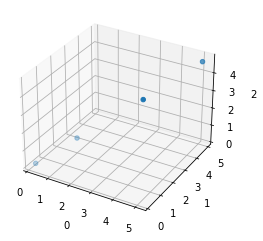

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = iris.data[0]
y = iris.data[1]
z = iris.data[2]

ax.set_xlabel("0")
ax.set_ylabel("1")
ax.set_zlabel("2")

ax.scatter(x, y, z)

plt.show()